# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [3]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [4]:
len(df)

400

Answer: 400 observations

> ### Question 2.  Create a summary table.

In [5]:
df.describe()

/Users/Elizabeth/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

In [7]:
print df['gre'].var()
print df['gpa'].var()

13369.9530398
0.144879486222


In [13]:
print df['gre'].quantile(q=0.75)

nan


Answer: GRE has a larger variance than GPA because the 

> ### Question 4.  Drop data points with missing data.

In [8]:
df_no_na = df.dropna(how='any',axis=0)
print df_no_na

     admit    gre   gpa  prestige
0        0  380.0  3.61       3.0
1        1  660.0  3.67       3.0
2        1  800.0  4.00       1.0
3        1  640.0  3.19       4.0
4        0  520.0  2.93       4.0
..     ...    ...   ...       ...
395      0  620.0  4.00       2.0
396      0  560.0  3.04       3.0
397      0  460.0  2.63       2.0
398      0  700.0  3.65       2.0
399      0  600.0  3.89       3.0

[397 rows x 4 columns]


> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [9]:
df_no_na.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: You can tell because no columns have null values anymore. 

> ### Question 6.  Create boxplots for `gre` and `gpa`.

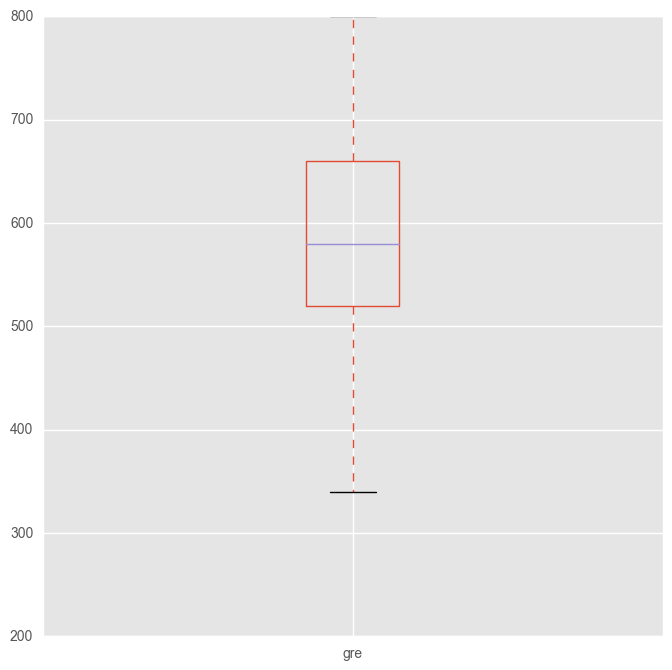

In [16]:
df_no_na.gre.plot(kind = 'box', figsize = (8, 8))

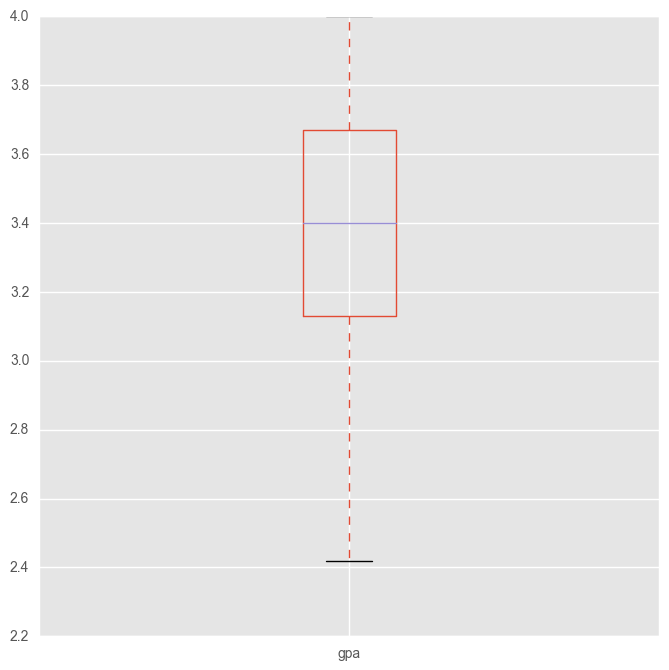

In [14]:
df_no_na.gpa.plot(kind = 'box', figsize = (8, 8))

> ### Question 7.  What do boxplots show?

Answer: The boxplots show that the IQR for GPA is less than 0.6, while the IQR of GRE score is more like 150 points. 

> ### Question 8.  Plot the distribution of each variable.

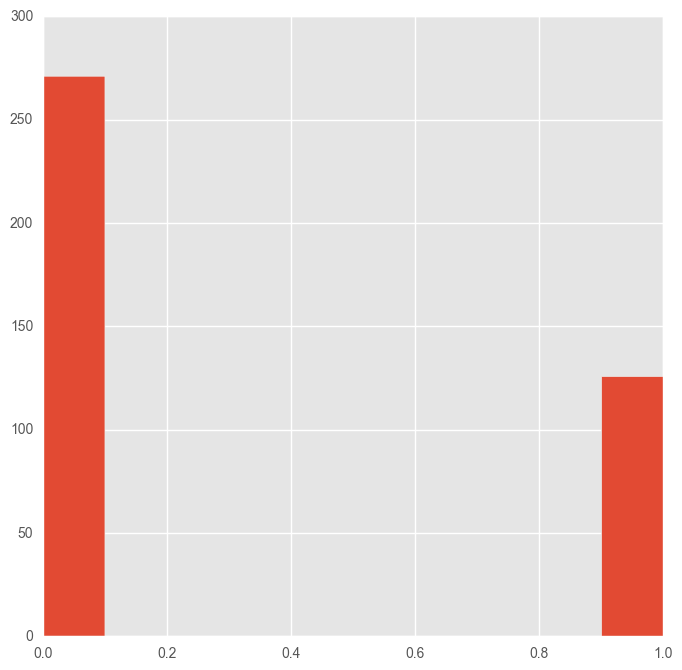

In [17]:
df_no_na.admit.hist(figsize = (8, 8))

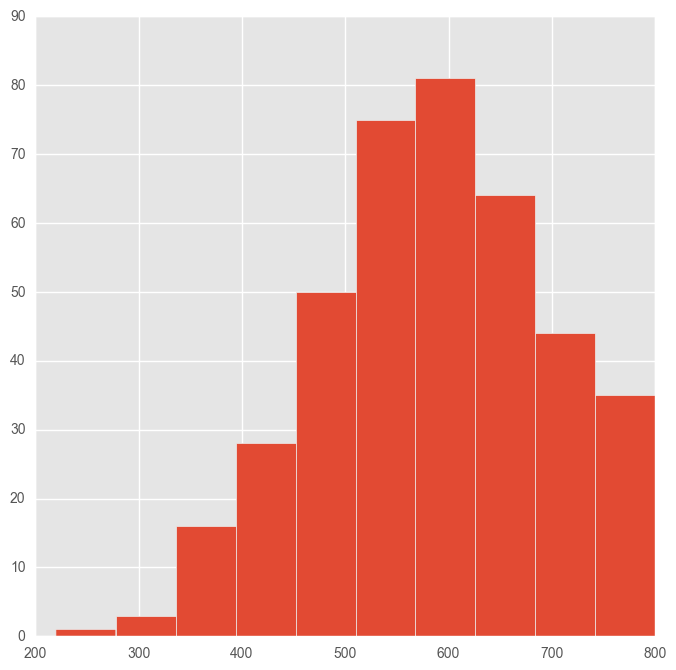

In [18]:
df_no_na.gre.hist(figsize = (8, 8))

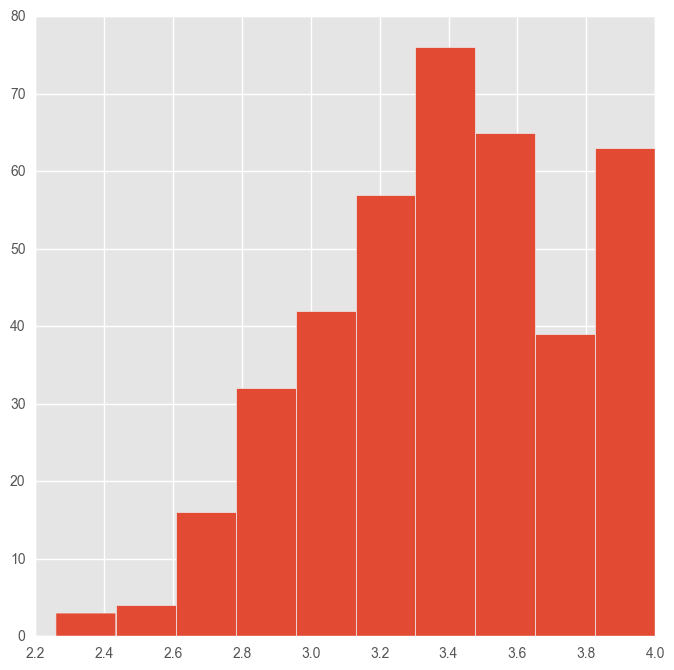

In [19]:
df_no_na.gpa.hist(figsize = (8, 8))

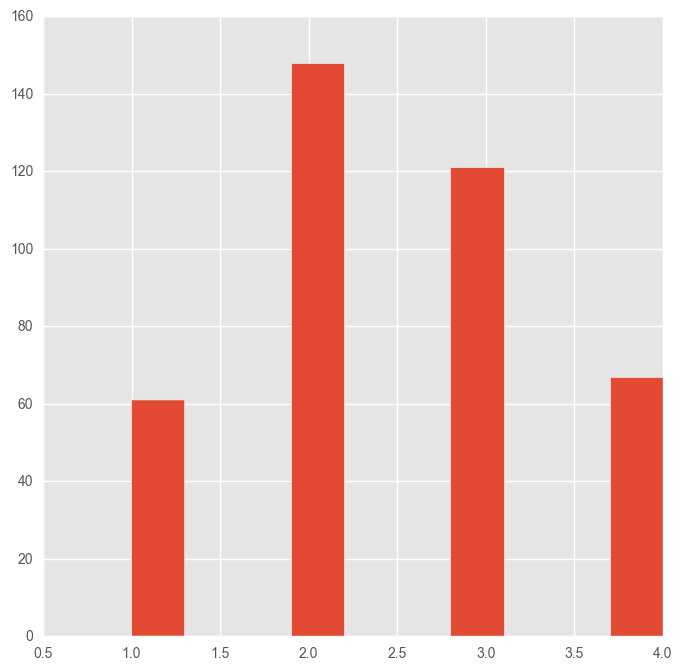

In [20]:
df_no_na.prestige.hist(figsize = (8, 8))

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

In [ ]:
# TODO

In [ ]:
# TODO

Answer:

> ### Question 10.  Create a correlation matrix for the dataset

In [ ]:
# TODO

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

Answer:

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

Answer:

> ### Question 13.  What is your hypothesis?

Answer: